In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import rtree
import datetime

#make sure python plots are embedded in the notebook
%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

In [3]:
#read 311 data
df311 = pd.read_csv('ads_final_data/311.csv')
df311 = df311.dropna(subset=['latitude','longitude'])
df311.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,...,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),latitude,longitude,location
0,0,21722467,2011-10-24 08:58:00,2011-10-26 01:45:00,dep,department of environmental protection,noise,noise: construction before/after hours (nm1),NaN,10005,...,the department of environmental protection did...,10/26/2011 01:45:00 AM,01 MANHATTAN,NaN,manhattan,981440.0,197131.0,40.707755,-74.010135,"(40.70775536877042, -74.01013530920267)"
1,1,21722472,2011-10-24 16:45:00,2011-10-25 11:30:00,dep,department of environmental protection,noise,noise: jack hammering (nc2),NaN,10028,...,the department of environmental protection did...,10/25/2011 11:30:00 AM,08 MANHATTAN,1.015490e+09,manhattan,997734.0,222619.0,40.777704,-73.951314,"(40.77770372685646, -73.95131385274287)"
2,2,21722487,2011-10-24 11:19:00,2011-11-01 17:15:00,dep,department of environmental protection,noise,"noise, barking dog (nr5)",NaN,10026,...,the department of environmental protection did...,11/01/2011 05:15:00 PM,10 MANHATTAN,1.019030e+09,manhattan,998231.0,232077.0,40.803663,-73.949500,"(40.80366261566248, -73.9494996673605)"
3,3,21722492,2011-10-24 04:26:00,2011-10-27 15:46:00,dep,department of environmental protection,noise,"noise, barking dog (nr5)",NaN,10001,...,the department of environmental protection det...,10/27/2011 03:46:00 PM,04 MANHATTAN,1.007530e+09,manhattan,985099.0,212659.0,40.750376,-73.996936,"(40.750376340381756, -73.99693580682785)"
4,4,21722493,2011-10-24 04:45:00,2012-01-30 11:15:00,dep,department of environmental protection,noise,noise: construction before/after hours (nm1),NaN,11219,...,the department of environmental protection did...,01/30/2012 11:15:00 AM,12 BROOKLYN,3.056530e+09,brooklyn,984468.0,171470.0,40.637322,-73.999215,"(40.637322127875585, -73.99921453191904)"


In [4]:
df311_time = df311[['unique_key','created_date','descriptor']]
df311_time.head()

,unique_key,created_date,descriptor
0,21722467,2011-10-24 08:58:00,noise: construction before/after hours (nm1)
1,21722472,2011-10-24 16:45:00,noise: jack hammering (nc2)
2,21722487,2011-10-24 11:19:00,"noise, barking dog (nr5)"
3,21722492,2011-10-24 04:26:00,"noise, barking dog (nr5)"
4,21722493,2011-10-24 04:45:00,noise: construction before/after hours (nm1)


In [5]:
df311_time['created_date'] = [datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df311_time.created_date]

In [6]:
df311_time['year'] = [x.year for x in df311_time.created_date]

In [7]:
df311_time.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2010])

In [8]:
df311_time.loc[:,'month'] = [x.month for x in df311_time.created_date]

In [9]:
df311_time['hour'] = [x.hour for x in df311_time.created_date]

In [10]:
df311_time.head()

,unique_key,created_date,descriptor,year,month,hour
0,21722467,2011-10-24 08:58:00,noise: construction before/after hours (nm1),2011,10,8
1,21722472,2011-10-24 16:45:00,noise: jack hammering (nc2),2011,10,16
2,21722487,2011-10-24 11:19:00,"noise, barking dog (nr5)",2011,10,11
3,21722492,2011-10-24 04:26:00,"noise, barking dog (nr5)",2011,10,4
4,21722493,2011-10-24 04:45:00,noise: construction before/after hours (nm1),2011,10,4


      unique_key
year            
2010       82547
2011        9088
2012       51458
2013       94926
2014       78000
2015       67855
2016      397602
2017       66309
2018       65117
2019      203756


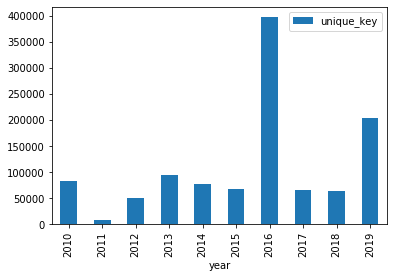

In [11]:
year_table = pd.pivot_table(df311_time,values='unique_key',index='year',aggfunc=len)
print(year_table)
year_table.plot.bar()

                                                    unique_key
descriptor                                                    
noise: vehicle (nr2)                                        26
noise: loud music/daytime (mark date and time) ...          48
news gathering                                             108
noise: loud music/nighttime(mark date and time)...         152
nypd                                                       159
noise: air condition/ventilation equip, residen...         458
noise: other noise sources (use comments) (nzz)            518
noise: air condition/ventilation equip, commerc...         562
horn honking sign requested (nr9)                          749
noise: boat(engine,music,etc) (nr10)                      1114
21 collection truck noise                                 1274
noise, other animals (nr6)                                1500
other                                                     2126
noise: manufacturing noise (nk1)                       

Text(0, 0.5, '')

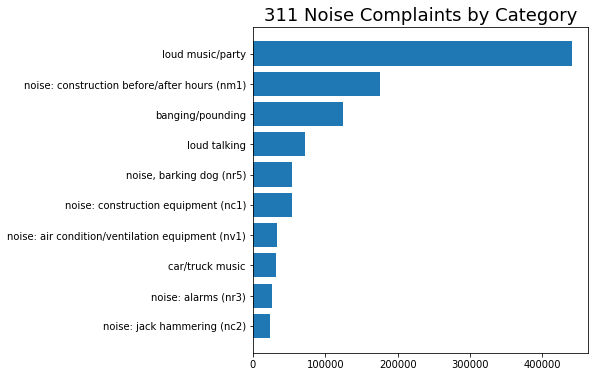

In [12]:
category_table = pd.pivot_table(df311_time,values='unique_key',index='descriptor',aggfunc=len)
category_table = category_table.sort_values(by='unique_key', ascending=True)
f, ax = plt.subplots(1, figsize=(6, 6))
ax.set_title("311 Noise Complaints by Category", fontsize=18)
print(category_table)
plt.barh(category_table.index[-10:], category_table.unique_key[-10:])
#category_table[:10].plot.barh(ax=ax,legend=False)
plt.ylabel("")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

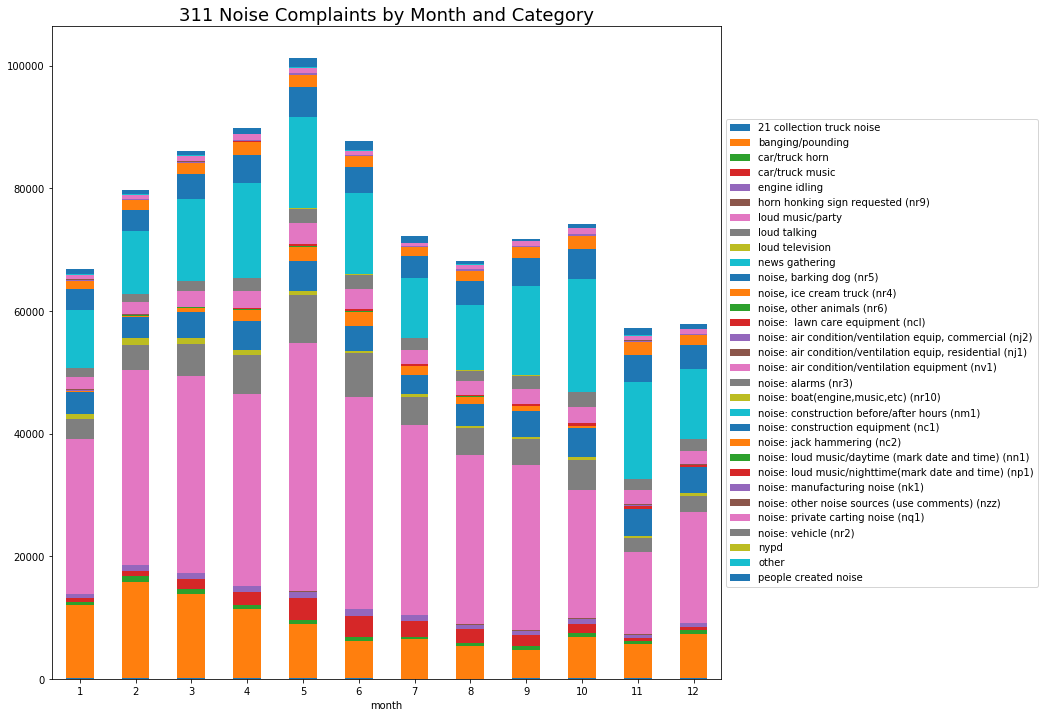

In [35]:
#2019 data only updated to 2019/11/06, so we only use data from 2010 to 2018 for this part
df311_time_mon = df311_time[df311_time['year']!=2019]
month_table = pd.pivot_table(df311_time_mon,index='month', columns='descriptor', values='unique_key',aggfunc=len)
#print(month_table)
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("311 Noise Complaints by Month and Category", fontsize=18)
month_table.plot.bar(stacked=True,ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='horizontal')

In [36]:
month_table = pd.DataFrame(month_table).T
month_table = month_table.div(month_table.sum(axis=1),axis=0)
month_table = month_table.dropna(0)
month_table

month,1,2,3,4,5,6,7,8,9,10,11,12
descriptor,,,,,,,,,,,,
21 collection truck noise,0.119621,0.124785,0.129088,0.088640,0.075731,0.064544,0.035284,0.039587,0.044750,0.068847,0.106713,0.102410
banging/pounding,0.114409,0.151823,0.132202,0.108420,0.085490,0.059638,0.062192,0.051675,0.045619,0.064659,0.054046,0.069826
car/truck horn,0.073446,0.118782,0.108309,0.094254,0.099077,0.081301,0.057048,0.052914,0.071793,0.103348,0.059942,0.079785
car/truck music,0.028524,0.038063,0.075895,0.102898,0.162481,0.158103,0.118750,0.106216,0.087139,0.068522,0.026635,0.026773
engine idling,0.072818,0.101074,0.101377,0.092161,0.106948,0.111302,0.089123,0.076666,0.069273,0.077476,0.043751,0.058031
horn honking sign requested (nr9),0.057410,0.049399,0.060080,0.098798,0.080107,0.094793,0.041389,0.057410,0.104139,0.121495,0.113485,0.121495
loud music/party,0.075499,0.095648,0.096419,0.093575,0.121375,0.103449,0.092868,0.082706,0.080943,0.063034,0.040108,0.054376
loud talking,0.058161,0.070858,0.090403,0.113829,0.137923,0.126332,0.082395,0.077707,0.072544,0.084204,0.040899,0.044745
loud television,0.128389,0.157079,0.141013,0.104289,0.081624,0.059676,0.053651,0.047913,0.044900,0.073447,0.048487,0.059532


In [40]:
month_table = month_table.T

In [44]:
len(month_table.T)

27

Text(0, 0.5, 'Complaints(Normalized)')

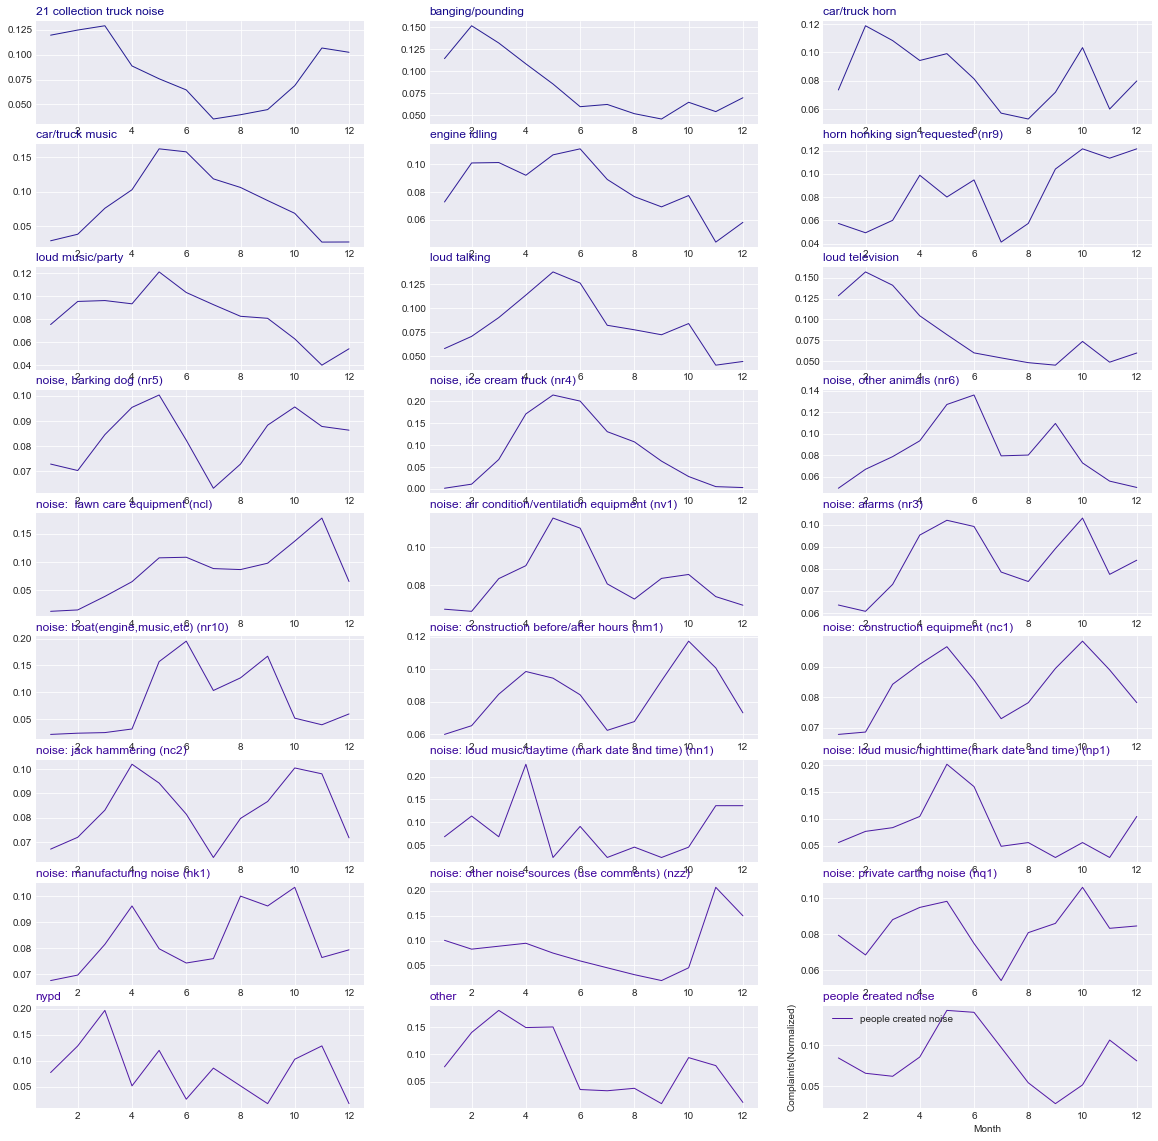

In [74]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('plasma')

plt.rcParams["figure.figsize"] = (20,20)

# multiple line plot
num=0
for column in month_table:
    num+=1
    plt.subplot(9,3, num)
    plt.plot(month_table.index, month_table[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )


# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
# general title
#plt.suptitle("311 Noise Complaints by Month for Each Category", fontsize=20, color='black', style='italic')
plt.xlabel("Month")
plt.ylabel("Complaints(Normalized)")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

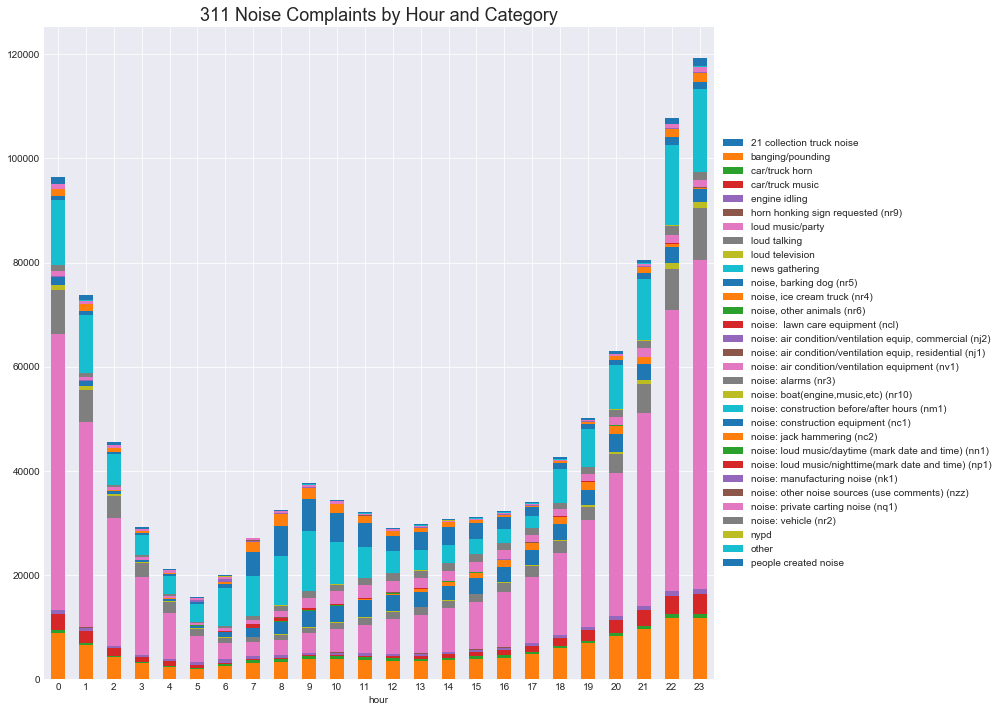

In [75]:
hour_table = pd.pivot_table(df311_time,index='hour', columns='descriptor', values='unique_key',aggfunc=len)
#print(hour_table)
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("311 Noise Complaints by Hour and Category", fontsize=18)
hour_table.plot.bar(stacked=True,ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='horizontal')

In [76]:
hour_table = pd.DataFrame(hour_table).T
hour_table = hour_table.div(hour_table.sum(axis=1),axis=0)
hour_table = hour_table.dropna(0)
hour_table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
descriptor,,,,,,,,,,,,,,,,,,,,,
21 collection truck noise,0.047096,0.083987,0.060440,0.054945,0.032967,0.029827,0.088697,0.070644,0.073783,0.077708,...,0.021978,0.019623,0.029042,0.014129,0.009419,0.014914,0.013344,0.021978,0.032967,0.047881
banging/pounding,0.071445,0.051972,0.033623,0.024080,0.019127,0.016045,0.020083,0.024369,0.026223,0.030044,...,0.029450,0.031223,0.033094,0.038319,0.047525,0.055167,0.066685,0.077280,0.093951,0.093510
car/truck horn,0.046409,0.028587,0.019764,0.013940,0.019587,0.016234,0.023999,0.045174,0.053732,0.048791,...,0.040939,0.050644,0.049497,0.046938,0.043939,0.046674,0.046321,0.056644,0.066525,0.068114
car/truck music,0.095661,0.076343,0.049104,0.031835,0.029102,0.016088,0.007858,0.006553,0.005249,0.007392,...,0.021182,0.025499,0.029351,0.035252,0.049073,0.061776,0.078889,0.092524,0.110041,0.121782
engine idling,0.055321,0.043965,0.030922,0.031382,0.030691,0.039515,0.054093,0.043428,0.035065,0.035986,...,0.033837,0.030845,0.031612,0.036906,0.038901,0.043889,0.053096,0.063838,0.067981,0.073045
horn honking sign requested (nr9),0.018692,0.018692,0.005340,0.001335,0.005340,0.006676,0.010681,0.026702,0.048064,0.054740,...,0.056075,0.082777,0.061415,0.066756,0.052069,0.056075,0.065421,0.021362,0.038718,0.022697
loud music/party,0.120351,0.089446,0.055712,0.033813,0.019808,0.011562,0.007275,0.006134,0.006717,0.008534,...,0.018969,0.020404,0.024156,0.028550,0.035635,0.046462,0.062459,0.084099,0.122343,0.143148
loud talking,0.114459,0.084593,0.056455,0.036817,0.029437,0.018436,0.013019,0.013171,0.013889,0.013917,...,0.018685,0.021186,0.023978,0.029948,0.031054,0.036513,0.049241,0.075983,0.109166,0.137193
loud television,0.124048,0.088018,0.049450,0.032402,0.023939,0.019707,0.013783,0.010881,0.013420,0.011728,...,0.013299,0.015718,0.019103,0.024785,0.029017,0.036876,0.057188,0.080039,0.124652,0.150284


In [77]:
hour_table = hour_table.T

In [78]:
len(hour_table.T)

26

Text(0, 0.5, 'Complaints(Normalized)')

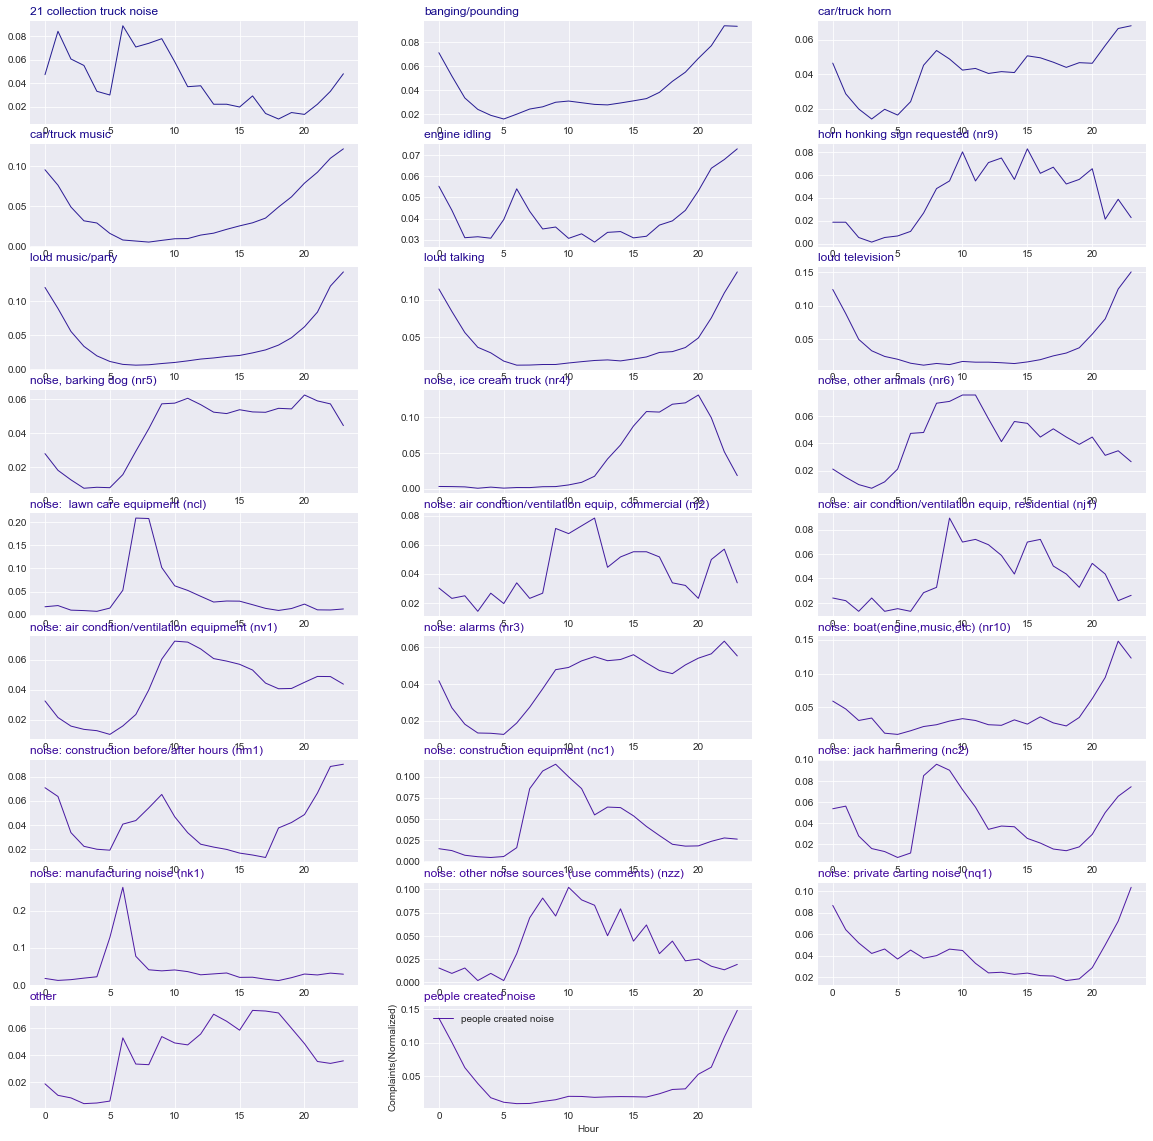

In [79]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('plasma')

plt.rcParams["figure.figsize"] = (20,20)

# multiple line plot
num=0
for column in hour_table:
    num+=1
    plt.subplot(9,3, num)
    plt.plot(hour_table.index, hour_table[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )


# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
# general title
#plt.suptitle("311 Noise Complaints by Hour for Each Category", fontsize=20, color='black', style='italic')
plt.xlabel("Hour")
plt.ylabel("Complaints(Normalized)")


In [110]:
df311_time['date'] = [x.date() for x in df311_time.created_date]

In [111]:
df311_time.head()

,unique_key,created_date,descriptor,year,month,hour,date
0,21722467,2011-10-24 08:58:00,noise: construction before/after hours (nm1),2011,10,8,2011-10-24
1,21722472,2011-10-24 16:45:00,noise: jack hammering (nc2),2011,10,16,2011-10-24
2,21722487,2011-10-24 11:19:00,"noise, barking dog (nr5)",2011,10,11,2011-10-24
3,21722492,2011-10-24 04:26:00,"noise, barking dog (nr5)",2011,10,4,2011-10-24
4,21722493,2011-10-24 04:45:00,noise: construction before/after hours (nm1),2011,10,4,2011-10-24


In [166]:
#select data from 2010-01-01 to 2018-12-31
date_table = pd.pivot_table(df311_time_mon,index='date', columns='descriptor', values='unique_key',aggfunc=len)
date_table = date_table.fillna(0)
date_table['total_complaints'] = date_table.sum(axis = 1)
date_table

descriptor,21 collection truck noise,banging/pounding,car/truck horn,car/truck music,engine idling,horn honking sign requested (nr9),loud music/party,loud talking,loud television,news gathering,...,noise: loud music/daytime (mark date and time) (nn1),noise: loud music/nighttime(mark date and time) (np1),noise: manufacturing noise (nk1),noise: other noise sources (use comments) (nzz),noise: private carting noise (nq1),noise: vehicle (nr2),nypd,other,people created noise,total_complaints
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,119.0,7.0,7.0,0.0,0.0,496.0,27.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.0
2010-01-02,0.0,95.0,1.0,7.0,2.0,0.0,291.0,17.0,4.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,418.0
2010-01-03,0.0,88.0,7.0,1.0,4.0,0.0,152.0,7.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0
2010-01-04,0.0,88.0,4.0,2.0,4.0,0.0,115.0,14.0,10.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,238.0
2010-01-05,0.0,86.0,5.0,4.0,7.0,0.0,120.0,14.0,8.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,125.0
2018-12-28,1.0,11.0,0.0,0.0,0.0,0.0,20.0,4.0,1.0,0.0,...,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,151.0
2018-12-29,0.0,2.0,0.0,0.0,1.0,0.0,14.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,155.0


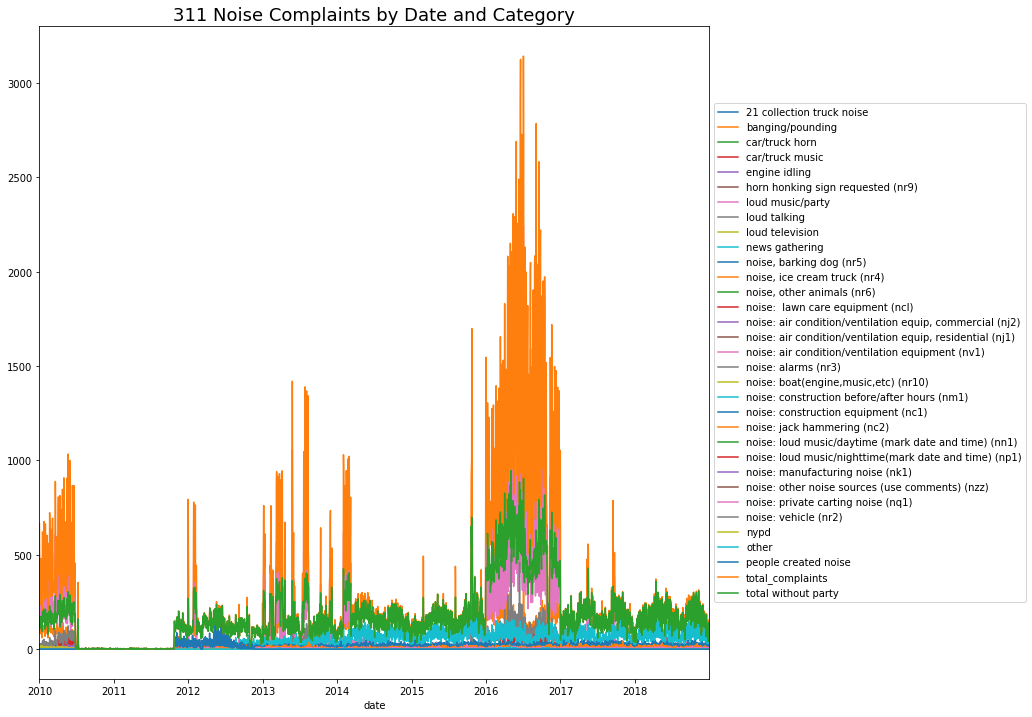

In [188]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("311 Noise Complaints by Date and Category", fontsize=18)
date_table.plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

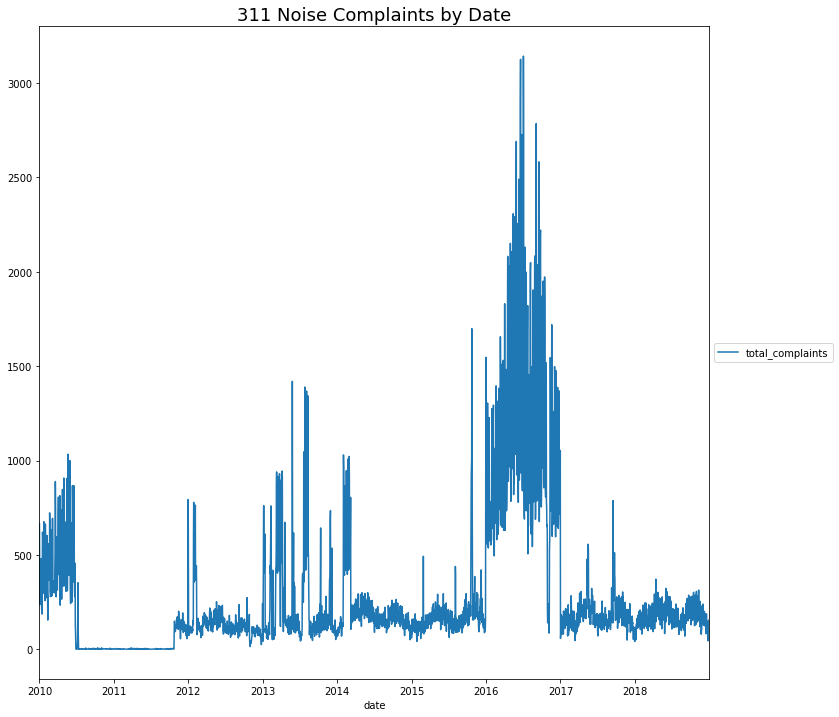

In [189]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("311 Noise Complaints by Date", fontsize=18)
date_table.total_complaints.plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

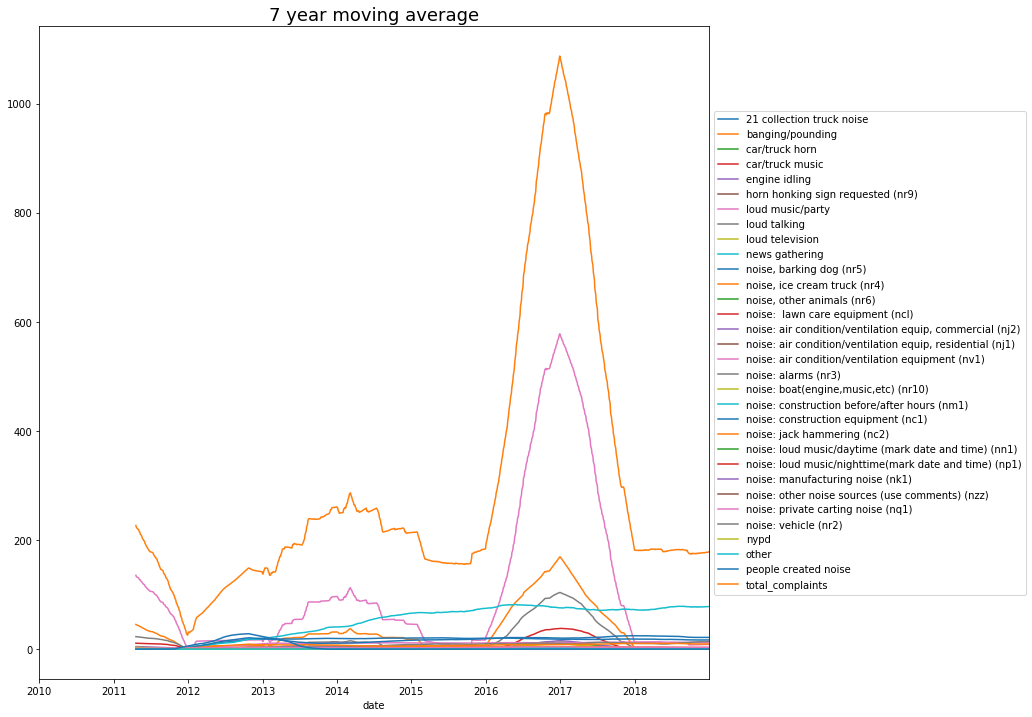

In [170]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("7 year moving average", fontsize=18)
date_table.rolling(window = 365).mean().plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [172]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = [8, 8]

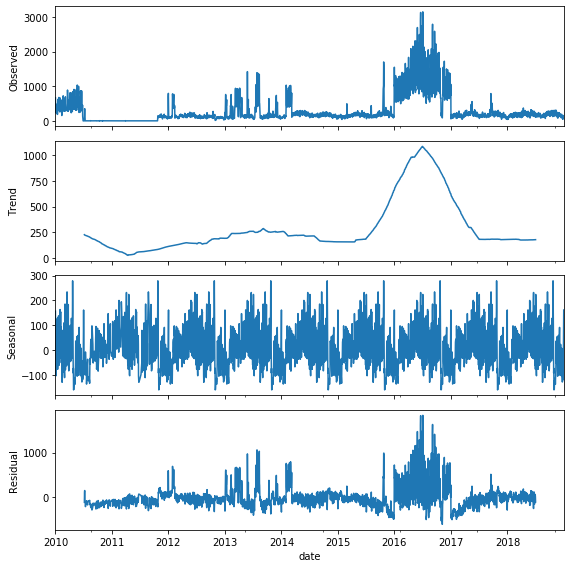

In [186]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

res = sm.tsa.seasonal_decompose(date_table['total_complaints'],model='addictive',freq=365) #try mult
res.plot()
plt.show()

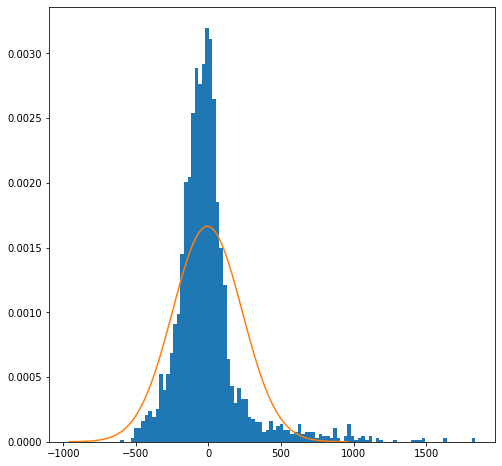

In [175]:
import scipy
import numpy as np
from numpy.random import seed
from numpy.random import randn
# seed the random number generator
seed(1)
# generate univariate observations
# histogram plot
addResult = sm.tsa.seasonal_decompose(date_table['total_complaints'], model='additive', freq = 365)
residual = np.array(addResult.resid)
residual = residual[np.logical_not(np.isnan(residual))]
# get rid of nan values from the seasonal_decompose
plt.hist(residual,bins=100,density=True)
sigma=residual.std()
x=np.linspace(-4*sigma,4*sigma,100)
plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma))
plt.show()